In [1]:
#Data manipulation, handling and function creation
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Genetic programming libraries
import gplearn as gp
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

In [7]:
# Image format
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='notebook', font='Times New Roman', font_scale=1, style='ticks')
%matplotlib notebook

<IPython.core.display.Javascript object>


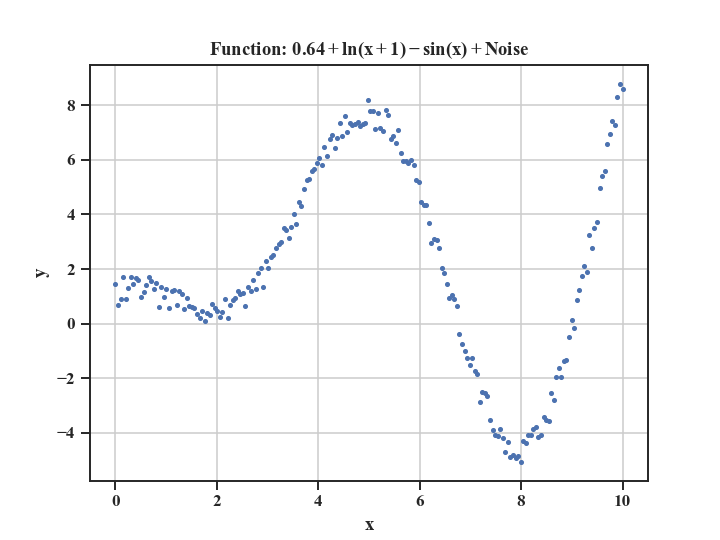

In [8]:
# Create an x vector
x= np.linspace(0,10,200)

# Create a function
fun1=0.64+np.log(x+1)-np.sin(x)*x+np.random.rand(len(x))
x = x.reshape(-1, 1)

# Visualization
plt.figure()
plt.scatter(x,fun1, c='b', s=5)
plt.title('Function: $0.64+ln(x+1)-sin(x)+Noise$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [9]:
# Since the functions are not defined, one can compute the operations:
def sub(a,b):
    return a-b
def add(a,b):
    return a+b
def mul(a,b):
    return a*b
def tan(a):
    return np.tan(a)
def sin(a):
    return np.sin(a)
def div(a,b):
    return a/b
def log(a):
    return np.log(np.abs(a))
def cos(a):
    return np.cos(a)
def neg(a):
    return -1*a
def exp(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)

In [10]:
exponential = make_function(function=exp, name='exp', arity=1)

est_gp = SymbolicRegressor(population_size=5000,
                           generations=30,
                           tournament_size = 50,
                           stopping_criteria=0.01,
                           const_range = (-1,1),
                           function_set = ['add', 'sub', 'mul', 'sin', 'neg','log','neg'],
                           p_crossover=0.7,
                           p_subtree_mutation=0.05,
                           p_hoist_mutation = 0.01,
                           p_point_mutation = 0.1,
                           verbose=.1,
                           parsimony_coefficient=0.003)
est_gp.fit(x,fun1 )
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.40           30.617       44          1.38716              N/A      1.22m
   1    15.14          4.90849       43          0.73042              N/A      1.18m
   2    32.61          4.90809       24         0.422302              N/A      1.30m
   3    35.13          5.21026       25         0.365135              N/A      1.38m
   4    31.53          7.91726       26         0.260481              N/A      1.24m
   5    25.08          4.02469       26         0.260481              N/A      1.13m
   6    25.89          3.06588       27         0.259187              N/A      1.14m
   7    25.38          2.97059       25         0.259183              N/A      1.13m
   8    23.53          3.28597       25         0.259183              N/A  

<IPython.core.display.Javascript object>


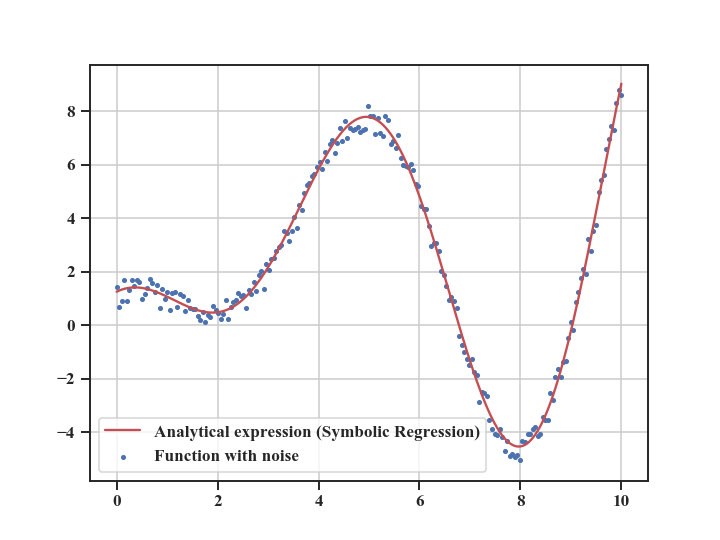

In [13]:
# X0 is the x vector previously generated
X0=x

# Expression obtained by symbolic regression
y1 = add(neg(sub(neg(mul(neg(X0), sin(X0))), 0.483)), log(add(add(X0, X0), neg(log(-0.117)))))

# Plot figure
plt.figure()
plt.plot(x,y1, label= 'Analytical expression (Symbolic Regression)', c='r')
plt.scatter(x,fun[-1], c='b', label = 'Function with noise', s=5)
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


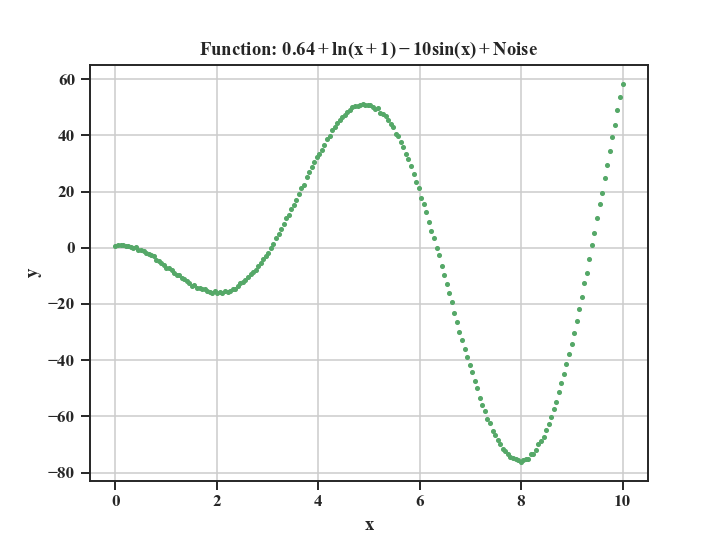

In [43]:
# Create an x vector
x= np.linspace(0,10,200)

# Create a similar function (multiply sin times 10)
fun2 = 0.64 + np.log(x+1) - 10*np.sin(x)*x + np.random.rand(len(x))
x = x.reshape(-1, 1)

# Visualization
plt.figure()
plt.scatter(x,fun1, c='g', s=5)
plt.title('Function: $0.64+ln(x+1)-10sin(x)+Noise$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [27]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=30,
                           tournament_size = 50,
                           stopping_criteria=0.01,
                           const_range = (-1,1),
                           function_set = ['add', 'sub', 'mul', 'sin', 'neg','log','neg'],
                           p_crossover=0.7,
                           p_subtree_mutation=0.05,
                           p_hoist_mutation = 0.01,
                           p_point_mutation = 0.1,
                           verbose=.1,
                           parsimony_coefficient=0.003)

est_gp.fit(x,fun2)
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.22          51.8727       53          8.43301              N/A      1.21m
   1    20.06          35.0604       54          5.43143              N/A      1.17m
   2    34.99          92.9066       38          5.12778              N/A      1.21m
   3    49.83          39.2626       60           4.6691              N/A      1.26m
   4    51.26          35.8129       72          4.47556              N/A      1.16m
   5    51.19          36.6326       39          4.20604              N/A      1.11m
   6    56.60          31.2226       79          4.06797              N/A      1.10m
   7    59.96          43.5148       41           3.7602              N/A      1.06m
   8    53.52          34.3796       71          3.42183              N/A  

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sin
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


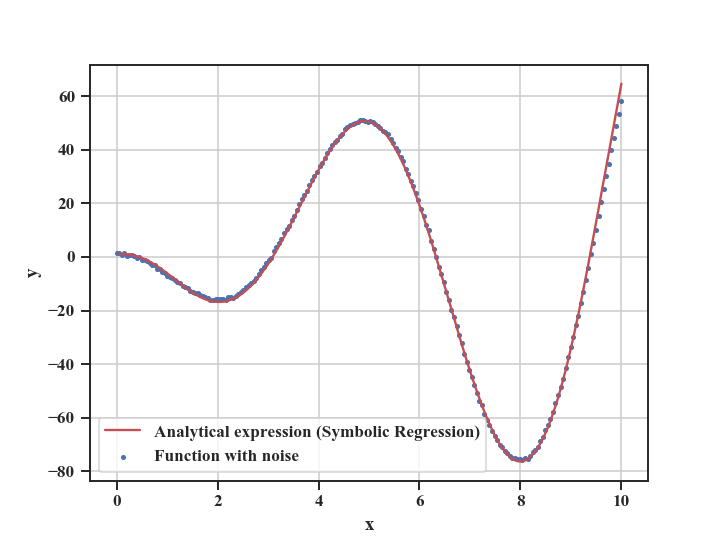

In [44]:
# X0 is the x vector previously generated
X0=x

# Expression obtained by symbolic regression
y2 = add(mul(add(mul(sin(log(X0)), sub(mul(X0, X0), log(mul(0.222, -0.020)))), sub(
    add(X0, X0), log(sin(mul(mul(0.230, -0.160), -0.160))))), sin(neg(X0))), neg(sub(
    add(sin(X0), add(sub(add(sin(X0), sub(neg(X0), sin(add(neg(neg(X0)), add(
    neg(X0), sub(add(X0, X0), log(add(neg(X0), sub(add(X0, X0), log(mul(
    X0, X0))))))))))), sin(neg(X0))), sin(sin(sub(add(X0, X0), log(sin(mul(mul(
    X0, -0.160), -0.160)))))))), neg(log(X0)))))

# Plot figure
plt.figure()
plt.plot(x,y2, label= 'Analytical expression (Symbolic Regression)', c='r')
plt.scatter(x,fun2, c='b', label = 'Function with noise', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/dhdzmota/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sin
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


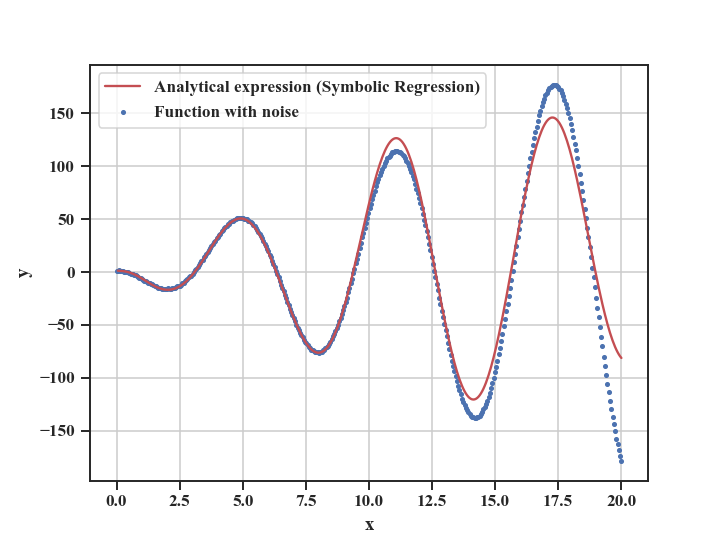

In [45]:
# X0 is the x vector previously generated
X0 = np.linspace(0, 20, 400).reshape(-1, 1)
x = np.linspace(0,20,400)
# Expression obtained by symbolic regression
y2 = add(mul(add(mul(sin(log(X0)), sub(mul(X0, X0), log(mul(0.222, -0.020)))), sub(
    add(X0, X0), log(sin(mul(mul(0.230, -0.160), -0.160))))), sin(neg(X0))), neg(sub(
    add(sin(X0), add(sub(add(sin(X0), sub(neg(X0), sin(add(neg(neg(X0)), add(
    neg(X0), sub(add(X0, X0), log(add(neg(X0), sub(add(X0, X0), log(mul(
    X0, X0))))))))))), sin(neg(X0))), sin(sin(sub(add(X0, X0), log(sin(mul(mul(
    X0, -0.160), -0.160)))))))), neg(log(X0)))))

fun2 = 0.64 + np.log(x+1) - 10*np.sin(x)*x + np.random.rand(len(x))

# Plot figure 
plt.figure()
plt.plot(X0,y2, label= 'Analytical expression (Symbolic Regression)', c='r')
plt.scatter(x,fun2, c='b', label = 'Function with noise', s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()